## Demo of linear regression with New York City Airbnb dataset 2023

### NYC Airbnb from 2011 to 2023

### Dataset from Kaggle from the link:

https://www.kaggle.com/datasets/godofoutcasts/new-york-city-airbnb-2023-public-data


## 1. Problem Statement:

Predict rental price performance based on the following inputs: minimum nights, number of reviews, reviews per month, calculated host listings count, availability, number of reviews ltm

In [1]:
# Importing all the python libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Exploratory data analysis (EDA)

In [3]:
#Load dataset
nyc_dataset = pd.read_csv('NYC-Airbnb-2023.csv')
nyc_dataset.head()

<ipython-input-3-3cc5970cdf1d>:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc_dataset = pd.read_csv('NYC-Airbnb-2023.csv')


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595.0,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,21/06/2022,0.30,3,314,1,NaN
1,5121.0,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2/12/2019,0.30,2,365,0,NaN
2,5203.0,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,21/07/2017,0.72,1,0,0,NaN
3,5178.0,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,19/02/2023,3.41,1,106,52,NaN
4,5136.0,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,10/08/2022,0.03,1,181,1,NaN


In [5]:
# Inspect the data types
nyc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42931 non-null  float64
 1   name                            42919 non-null  object 
 2   host_id                         42931 non-null  int64  
 3   host_name                       42926 non-null  object 
 4   neighbourhood_group             42931 non-null  object 
 5   neighbourhood                   42931 non-null  object 
 6   latitude                        42931 non-null  float64
 7   longitude                       42931 non-null  float64
 8   room_type                       42931 non-null  object 
 9   price                           42931 non-null  int64  
 10  minimum_nights                  42931 non-null  int64  
 11  number_of_reviews               42931 non-null  int64  
 12  last_review                     

In [40]:
# Check the sum of missing values
nyc_dataset.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             5
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10304
reviews_per_month                 10304
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           42930
dtype: int64

2. Data Pre-processing Steps

In [41]:

# Fill the missing values NaN from the 'license' column with the value of zero
df = nyc_dataset.fillna(0)

In [42]:
# Inspect the transformation
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595.0,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,21/06/2022,0.30,3,314,1,0
1,5121.0,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2/12/2019,0.30,2,365,0,0
2,5203.0,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,21/07/2017,0.72,1,0,0,0
3,5178.0,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,19/02/2023,3.41,1,106,52,0
4,5136.0,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,10/08/2022,0.03,1,181,1,0


In [45]:
# Impute missing values for the numeric columns 'reviews_per_month'

# Replace missing values in the 'reviews_per_month' column with the mean value

# calculate mean
mean_reviews_per_month = df['reviews_per_month'].mean()
print('mean_reviews_per_month: {}'.format(int(mean_reviews_per_month)))

# imputation
df['reviews_per_month'].fillna(int(mean_reviews_per_month), inplace=True)

# check again
print('Num of Missing values in "reviews_per_month" : {}'.format(df['reviews_per_month'].isnull().sum()))

mean_reviews_per_month: 0
Num of Missing values in "reviews_per_month" : 0


In [46]:
# Inspect the data transformation
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595.0,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,21/06/2022,0.30,3,314,1,0
1,5121.0,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2/12/2019,0.30,2,365,0,0
2,5203.0,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,21/07/2017,0.72,1,0,0,0
3,5178.0,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,19/02/2023,3.41,1,106,52,0
4,5136.0,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,10/08/2022,0.03,1,181,1,0


In [58]:
# Remove the non-numeric columns. Remove 'license' which is not a numerical value

new = df.drop(columns=['id', 'name', 'host_id', 'host_name','neighbourhood_group', 'neighbourhood', 'latitude', 'longitude','room_type', 'last_review', 'license'])

In [59]:
# Inspect the data transformation
new.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,150,30,49,0.30,3,314,1
1,60,30,50,0.30,2,365,0
2,75,2,118,0.72,1,0,0
3,68,2,575,3.41,1,106,52
4,275,60,3,0.03,1,181,1


In [61]:
# Inspect for any missing values
new.isnull().sum()


price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [62]:
# Data normalization to ensure that all the feature are on the same scale before making predictions

import pandas as pd
from sklearn.preprocessing import StandardScaler # for the z-score normalisation
import seaborn as sns

new.head()

std_scaler = StandardScaler()

df_scaled = std_scaler.fit_transform(new.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm'])

print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,-0.056205,0.432916,0.408791,-0.359206,-0.260363,1.223507,-0.368316
1,-0.156755,0.432916,0.426454,-0.359206,-0.272729,1.582662,-0.422990
2,-0.139997,-0.586668,1.627535,-0.102812,-0.285095,-0.987763,-0.422990
3,-0.147817,-0.586668,9.699503,1.539332,-0.285095,-0.241283,2.420087
4,0.083449,1.525327,-0.403704,-0.524031,-0.285095,0.286886,-0.368316


## 3. Visualize the transformed data

In [63]:
# Check for correlation
df_scaled.corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.020755,-0.016465,-0.009781,0.026166,0.027138,-0.008590
minimum_nights,-0.020755,1.000000,-0.138792,-0.240898,0.119961,-0.092420,-0.216535
number_of_reviews,-0.016465,-0.138792,1.000000,0.610913,-0.111142,0.046146,0.652952
reviews_per_month,-0.009781,-0.240898,0.610913,1.000000,-0.122133,0.138348,0.858619
calculated_host_listings_count,0.026166,0.119961,-0.111142,-0.122133,1.000000,0.126433,-0.097331
availability_365,0.027138,-0.092420,0.046146,0.138348,0.126433,1.000000,0.122621
number_of_reviews_ltm,-0.008590,-0.216535,0.652952,0.858619,-0.097331,0.122621,1.000000


<Axes: >

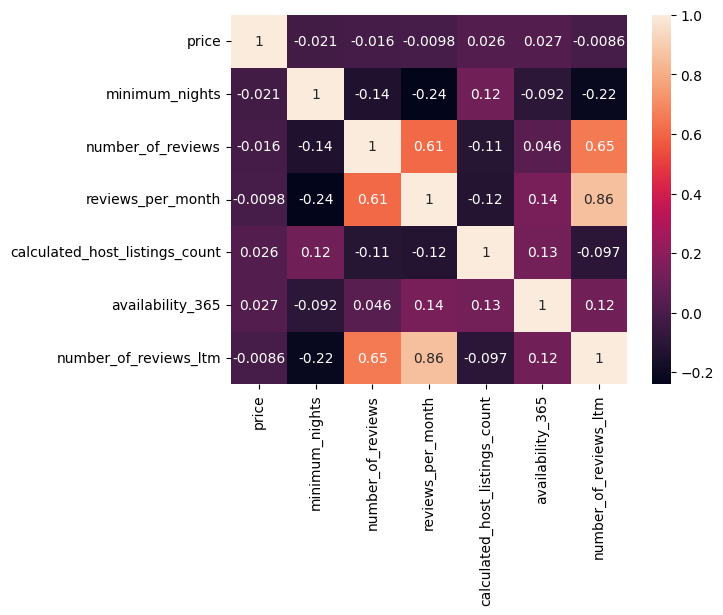

In [64]:
# Visualize correlation matrix. Correlation between 0 and 1. High correlation between 'price' with 'number_of_reviews', 'reviews_per_month', 'number_of_reviews_ltm'
sns.heatmap(df_scaled.corr(), annot=True)

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>,
        <Axes: title={'center': 'availability_365'}>],
       [<Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >,
        <Axes: >]], dtype=object)

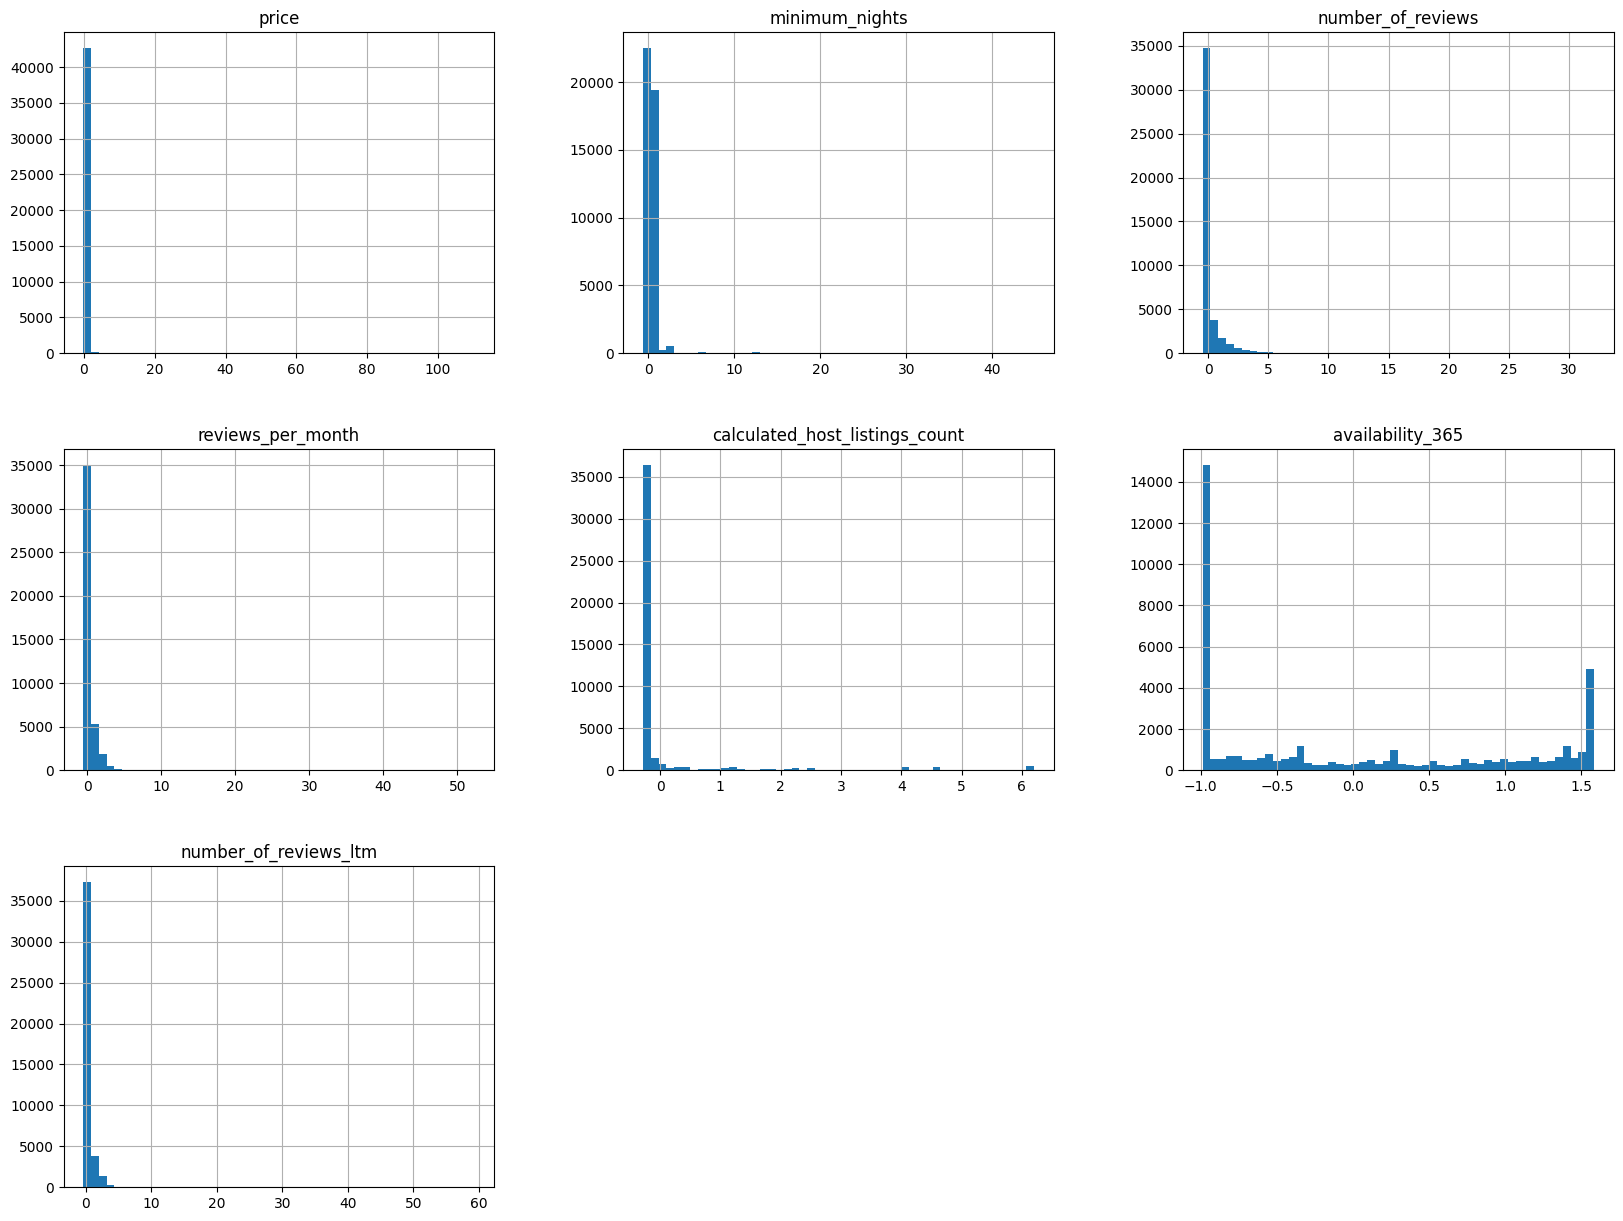

In [65]:
# Histogram - View the distributions of the variables toidentify any outliers

df_scaled.hist(bins=50, figsize=(20,15))

## 4. Build a linear regression model

In [66]:
# Import all standard Python libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
# Load the dataset using the transformed and scaled dataset
df_scaled.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,-0.056205,0.432916,0.408791,-0.359206,-0.260363,1.223507,-0.368316
1,-0.156755,0.432916,0.426454,-0.359206,-0.272729,1.582662,-0.422990
2,-0.139997,-0.586668,1.627535,-0.102812,-0.285095,-0.987763,-0.422990
3,-0.147817,-0.586668,9.699503,1.539332,-0.285095,-0.241283,2.420087
4,0.083449,1.525327,-0.403704,-0.524031,-0.285095,0.286886,-0.368316


In [72]:
# Partition the dataset
X = df_scaled.drop(['price'], axis = 1)
y = df_scaled['price']

In [73]:
# Splitting data into test data and train data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [74]:
# Train model - fitting linear regression model to training data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
# Retrieve the y-intercept
model.intercept_

0.0019614267490530167

In [76]:
# Provides the coefficients of the 6 features selected above.
model.coef_

array([-0.0286534 , -0.01615093, -0.00867191,  0.02252053,  0.02468935,
        0.0026365 ])

In [78]:
# predict y-value using the linear model based on the explanatory variables using 'test' or unseen data
y_pred = model.predict(X_test)
y_pred # print predicted values

array([ 0.14543115, -0.03028685, -0.03028685, ..., -0.03028685,
        0.00459621, -0.00592253])

In [79]:
#actual values of the test subset vs the predicted values of the test subset:
results_series = {"original":y_test, "predicted":y_pred}
results = pd.DataFrame(results_series)
print("*** First 5 rows of results ***")
results.head()

*** First 5 rows of results ***


,original,predicted
42494,0.672228,0.145431
6316,-0.056205,-0.030287
3935,-0.182451,-0.030287
5020,-0.112066,-0.031023
40591,-0.134411,0.063990


## 5. Evaluate the linear regression model

In [80]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',rmse)
r2 = metrics.r2_score(y_test,y_pred)
print('r2_score:', r2)

Mean Absolute Error: 0.14974739331760833
Mean Squared Error: 0.13344031120395403
Root Mean Squared Error: 0.3652948277815524
r2_score: 0.00862563955111828


## 6. Visualize the linear regression model

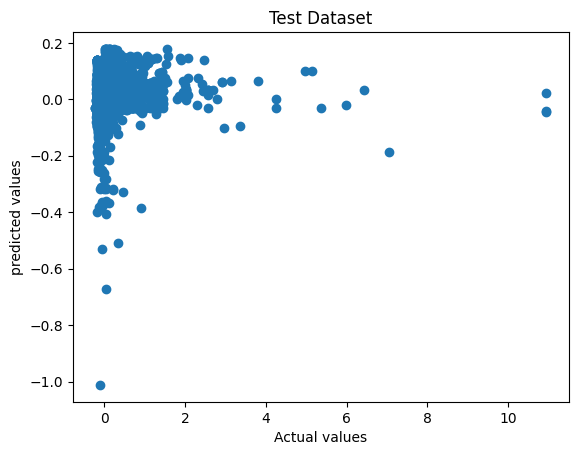

In [81]:
# Visualize the results

plt.title("Test Dataset")
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("predicted values")
plt.show()

r2 of 8%.  Explanatory variables do not explain the variance in the model